In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import EngFormatter


#Frequency Limits (MHz)

def imdplot(freqs, lims):
    dt = 0.000000001 #sampling interval
    Fs = 1/dt #sample freq
    t = np.arange(0.0, 0.0001, dt)
    #signal1 = mag*2*np.sin(2 * np.pi * freq * t)
    #Background 
    x = np.zeros(shape=len(t))
    #Add Base Frequencies
    for freq in freqs:
        signal = 1.0*2*np.sin(2 * np.pi * (freq*1000000) * t)
        x=x+signal
    #Calculate IMP
    imp=[]
    for freq1 in freqs:
        for freq2 in freqs:
            if freq1 != freq2:
                imp.append([(2*freq1 - freq2), 0.25])
                imp.append([2*freq2 - freq1, 0.25])
                imp.append([3*freq1 - 2*freq2, 0.15])
                imp.append([3*freq2 - 2*freq1, 0.15])
                imp.append([4*freq1 - 3*freq2, 0.075])
                imp.append([4*freq2 - 3*freq1, 0.075])
                #imp.append([5*freq1 - 4*freq2, 0.05])
                #imp.append([5*freq2 - 4*freq1, 0.05])                
    #Insert IMPs into plot
    for val in imp:
        signal = 2*(val[1]*np.sin(2 * np.pi * (val[0]*1000000) * t))
        x=x+signal
    
    fig, ax1 = plt.subplots()
    ax1.set_title("Relative Spectrum Magnitude")
    ax1.magnitude_spectrum(x, Fs=Fs)
    formatter0 = EngFormatter()
    ax1.xaxis.set_major_formatter(formatter0)
    ax1.set_xlabel('Frequency [Hz]')
    plt.xlim(lims[0]*1000000, lims[1]*1000000)

    plt.show()

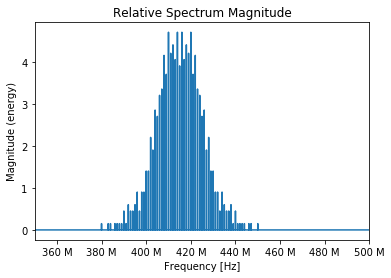

In [50]:
freqlist = [410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420]
limits = [350, 500]
imdplot(freqlist, limits)